## Euclidean and Manhattan Distance Calculations

In this short mini project you will see examples and comparisons of distance measures. Specifically, you'll visually compare the Euclidean distance to the Manhattan distance measures. The application of distance measures has a multitude of uses in data science and is the foundation of many algorithms you'll be using such as Prinical Components Analysis.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score




In [20]:
# Load Course Numerical Dataset
df = pd.read_csv(r"C:\Users\OR0293533\Downloads\1605005916_Euclidean_and_Manhattan_Distances_Case_Stud\data\distance_dataset.csv",index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


In [21]:
def euclidean(p, q):
    """Return Euclidean distance between 1D arrays p and q."""
    p = np.asarray(p, dtype=float); q = np.asarray(q, dtype=float)
    if p.shape != q.shape:
        raise ValueError("p and q must have same shape")
    return float(np.linalg.norm(p - q))

def manhattan(p, q):
    """Return Manhattan (L1) distance between 1D arrays p and q."""
    p = np.asarray(p, dtype=float); q = np.asarray(q, dtype=float)
    if p.shape != q.shape:
        raise ValueError("p and q must have same shape")
    return float(np.sum(np.abs(p - q)))

### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

We are using Pandas to load our dataset .CSV file and use Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we choose as reference. On the left here we show the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

In [22]:
def euclidean(p, q):
    """Return Euclidean distance between 1D arrays p and q."""
    p = np.asarray(p, dtype=float); q = np.asarray(q, dtype=float)
    if p.shape != q.shape:
        raise ValueError("p and q must have same shape")
    return float(np.linalg.norm(p - q))

def manhattan(p, q):
    """Return Manhattan (L1) distance between 1D arrays p and q."""
    p = np.asarray(p, dtype=float); q = np.asarray(q, dtype=float)
    if p.shape != q.shape:
        raise ValueError("p and q must have same shape")
    return float(np.sum(np.abs(p - q)))

**<font color='teal'>Create a distance to reference point (3,3) matrix similar to the above example.</font>**

In [23]:
# Setup numeric and categorical columns
numeric_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.number)]
categorical_cols = [c for c in df.columns if c not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['X', 'Y', 'Z', 'ClusterID']
Categorical columns: []


In [24]:
# Distance matrices on numeric features
# Distance matrices on numeric features
from sklearn.metrics import pairwise_distances  # <-- make sure this import is run

X = df[numeric_cols].astype(float).to_numpy()
D_euclid = pairwise_distances(X, metric="euclidean")
D_manh = pairwise_distances(X, metric="manhattan")

print("Euclidean distance matrix shape:", D_euclid.shape)
print("Manhattan distance matrix shape:", D_manh.shape)

# Show small corner for readability
pd.DataFrame(D_euclid).iloc[:5, :5]


Euclidean distance matrix shape: (2000, 2000)
Manhattan distance matrix shape: (2000, 2000)


,0,1,2,3,4
0,0.000000,1.842272,5.659267,0.961926,4.831433
1,1.842272,0.000000,5.622082,1.418239,5.370813
2,5.659267,5.622082,0.000000,4.963440,7.947913
3,0.961926,1.418239,4.963440,0.000000,5.405528
4,4.831433,5.370813,7.947913,5.405528,0.000000


**<font color='teal'>Replace the value set to 'c' in the plotting cell below with your own distance matrix and review the result to deepen your understanding of Euclidean distances. </font>**

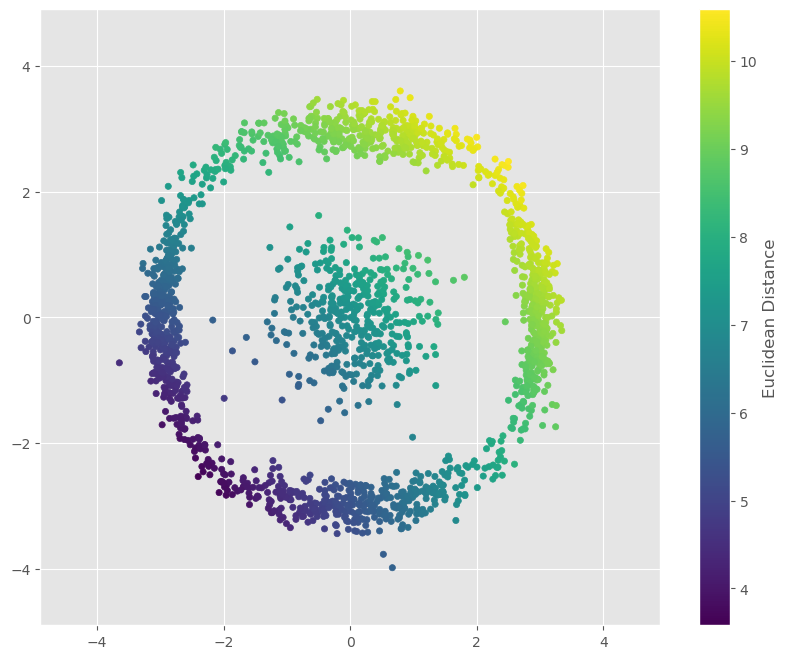

In [25]:
# Compute Euclidean distance from (0,0) using Y and Z columns
distEuclid = np.sqrt((df["Y"])**2 + (df["Z"])**2)

# Now plot
figEuclid = plt.figure(figsize=[10,8])
plt.scatter(df["Y"] - 5, df["Z"] - 5, c=distEuclid, s=20)
plt.ylim([-4.9, 4.9])
plt.xlim([-4.9, 4.9])
plt.colorbar(label="Euclidean Distance")
plt.show()


### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measure distances along the coorinate axis which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [26]:
def euclidean(p, q):
    """Return Euclidean distance between 1D arrays p and q."""
    p = np.asarray(p, dtype=float); q = np.asarray(q, dtype=float)
    if p.shape != q.shape:
        raise ValueError("p and q must have same shape")
    return float(np.linalg.norm(p - q))

def manhattan(p, q):
    """Return Manhattan (L1) distance between 1D arrays p and q."""
    p = np.asarray(p, dtype=float); q = np.asarray(q, dtype=float)
    if p.shape != q.shape:
        raise ValueError("p and q must have same shape")
    return float(np.sum(np.abs(p - q)))

**<font color='teal'>Create a Manhattan distance to reference point (4,4) matrix similar to the above example and replace the value for 'c' in the plotting cell to view the result.</font>**

In [27]:
# Distance matrices on numeric features
X = df[numeric_cols].astype(float).to_numpy()
D_euclid = pairwise_distances(X, metric="euclidean")
D_manh = pairwise_distances(X, metric="manhattan")

print("Euclidean distance matrix shape:", D_euclid.shape)
print("Manhattan distance matrix shape:", D_manh.shape)

# Show small top-left corner for readability
pd.DataFrame(D_euclid).iloc[:5, :5]

Euclidean distance matrix shape: (2000, 2000)
Manhattan distance matrix shape: (2000, 2000)


,0,1,2,3,4
0,0.000000,1.842272,5.659267,0.961926,4.831433
1,1.842272,0.000000,5.622082,1.418239,5.370813
2,5.659267,5.622082,0.000000,4.963440,7.947913
3,0.961926,1.418239,4.963440,0.000000,5.405528
4,4.831433,5.370813,7.947913,5.405528,0.000000


Now let's create distributions of these distance metrics and compare them. We leverage the scipy dist function to create these matrices similar to how you manually created them earlier in the exercise.

In [28]:
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].to_numpy()
DistEuclid = dist.pdist(mat,'euclidean')
DistManhattan = dist.pdist(mat, 'cityblock')
largeMat = np.random.random((10000,100))

**<font color='teal'>Plot histograms of each distance matrix for comparison.</font>**

In [29]:
# Distance matrices on numeric features
X = df[numeric_cols].astype(float).to_numpy()
D_euclid = pairwise_distances(X, metric="euclidean")
D_manh = pairwise_distances(X, metric="manhattan")

print("Euclidean distance matrix shape:", D_euclid.shape)
print("Manhattan distance matrix shape:", D_manh.shape)

# Show small top-left corner for readability
pd.DataFrame(D_euclid).iloc[:5, :5]

Euclidean distance matrix shape: (2000, 2000)
Manhattan distance matrix shape: (2000, 2000)


,0,1,2,3,4
0,0.000000,1.842272,5.659267,0.961926,4.831433
1,1.842272,0.000000,5.622082,1.418239,5.370813
2,5.659267,5.622082,0.000000,4.963440,7.947913
3,0.961926,1.418239,4.963440,0.000000,5.405528
4,4.831433,5.370813,7.947913,5.405528,0.000000


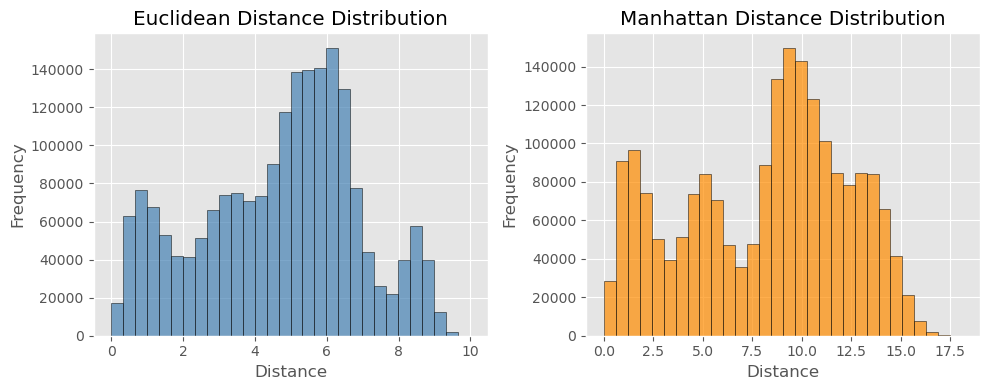

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances

# Compute both distance matrices
X = df[numeric_cols].astype(float).to_numpy()
D_euclid = pairwise_distances(X, metric="euclidean")
D_manh = pairwise_distances(X, metric="manhattan")

# Extract upper-triangle (unique pairwise distances, no self-distances)
dist_euclid = D_euclid[np.triu_indices_from(D_euclid, k=1)]
dist_manh = D_manh[np.triu_indices_from(D_manh, k=1)]

# Plot histograms for comparison
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(dist_euclid, bins=30, alpha=0.7, color="steelblue", edgecolor="black")
plt.title("Euclidean Distance Distribution")
plt.xlabel("Distance")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(dist_manh, bins=30, alpha=0.7, color="darkorange", edgecolor="black")
plt.title("Manhattan Distance Distribution")
plt.xlabel("Distance")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## Explanations 
- **Euclidean distance (L2):** \( d(x,y)=\sqrt{\sum_i (x_i-y_i)^2} \). Sensitive to large deviations (outliers) due to squaring.
- **Manhattan distance (L1):** \( d(x,y)=\sum_i |x_i-y_i| \). More robust to outliers; treats each dimension linearly.
- **Scaling:** Always scale features before distance-based methods; otherwise high-variance features dominate. We demonstrate both `StandardScaler` and `MinMaxScaler`.
- **Distance matrices:** Pairwise distances summarise similarities across the dataset; we show small corners for readability.
- **Outlier sensitivity:** A single feature with a big deviation inflates L2 more than L1.
- **kNN demo:** Changing the metric (L2 vs L1) can change nearest neighbors and accuracy; standardize features before kNN.
- **PCA plot:** A quick 2D view (post-standardization) to interpret cluster structure that distances will reflect.

## Effect of Feature Scaling 

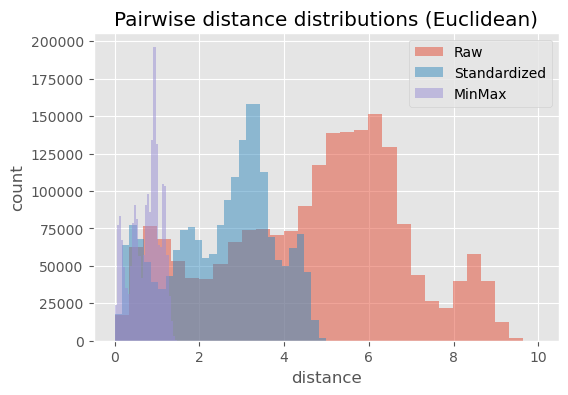

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np

# Use numeric columns from your DataFrame
X = df[numeric_cols].astype(float).to_numpy()

# Raw distances
D_raw = pairwise_distances(X, metric="euclidean")

# Standardization (z-score)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
D_std = pairwise_distances(X_std, metric="euclidean")

# MinMax scaling
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)
D_mm = pairwise_distances(X_mm, metric="euclidean")

# Visualize distributions
flat_raw = D_raw[np.triu_indices_from(D_raw, 1)]
flat_std = D_std[np.triu_indices_from(D_std, 1)]
flat_mm = D_mm[np.triu_indices_from(D_mm, 1)]

plt.figure(figsize=(6,4))
plt.hist(flat_raw, bins=30, alpha=0.5, label="Raw")
plt.hist(flat_std, bins=30, alpha=0.5, label="Standardized")
plt.hist(flat_mm, bins=30, alpha=0.5, label="MinMax")
plt.title("Pairwise distance distributions (Euclidean)")
plt.xlabel("distance")
plt.ylabel("count")
plt.legend()
plt.show()


## Outlier Sensitivity 

In [33]:
# Compare outlier sensitivity between L2 and L1
X = df[numeric_cols].astype(float).to_numpy()
# Pick a base row and create an outlier version by scaling one feature
base = X[0].copy()
outlier = base.copy()
if X.shape[1] > 0:
    outlier[0] = base[0] + 20 * (np.std(X[:,0]) if np.std(X[:,0])>0 else 1.0)

euc = euclidean(base, outlier)
man = manhattan(base, outlier)
print(f"Outlier perturbation -> Euclidean: {euc:.6f} | Manhattan: {man:.6f}")

Outlier perturbation -> Euclidean: 38.697671 | Manhattan: 38.697671


## kNN Demo (Euclidean vs Manhattan) 

In [34]:
y = df['ClusterID']
label_name = "ClusterID"


In [35]:
X = df[['X','Y','Z']].astype(float).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

for metric in ["euclidean", "manhattan"]:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(f"kNN (metric={metric}) accuracy: {accuracy_score(y_test, pred):.4f}")


kNN (metric=euclidean) accuracy: 0.9980
kNN (metric=manhattan) accuracy: 0.9980


## PCA Visualization 

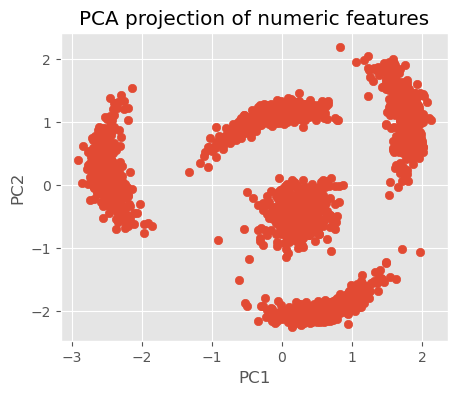

In [36]:
# Visualize data in 2D using PCA with distances in mind
X = df[numeric_cols].astype(float).to_numpy()
if X.shape[1] >= 2:
    Xs = StandardScaler().fit_transform(X)
    Z = PCA(n_components=2, random_state=0).fit_transform(Xs)
    plt.figure(figsize=(5,4))
    plt.scatter(Z[:,0], Z[:,1])
    plt.title("PCA projection of numeric features")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
else:
    print("Not enough numeric columns for PCA visualization.")